# Analysis of pharmaceutical companies on the stock exchange in 2020

To better understand the race for a COVID-19 vaccine: https://www.who.int/news-room/feature-stories/detail/the-race-for-a-covid-19-vaccine-explained

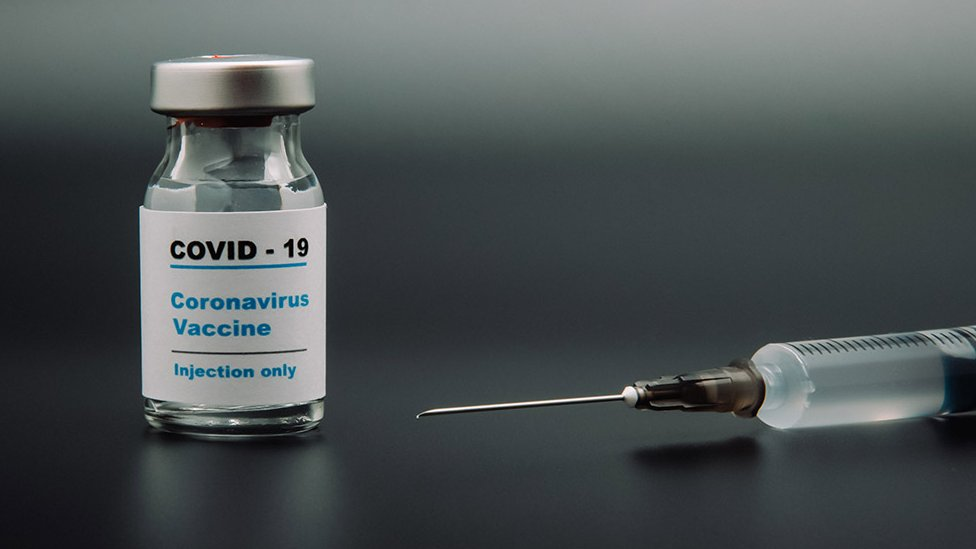

# Introduction

The Coronavirus pandemic has left traces of tragedy in many families, companies and countries. This would not differ in the financial market, where expectations influence decision making. Political changes, global catastrophes, pandemics can change investors' expectations about the future of some financial assets, exchanges and companies.

The objective of this project is to analyze the asset behavior of some companies that are in the race for the Covid-19 vaccine, for this I selected the following:

**PFIZER**: Pfizer Inc. develops, manufactures, and sells healthcare products worldwide. It offers medicines and vaccines in various therapeutic areas.

**ASTRAZENECA**: Moderna, Inc., a clinical stage biotechnology company, develops therapeutics and vaccines based on messenger RNA for the treatment of infectious diseases, immuno-oncology, rare diseases, and cardiovascular diseases.

**BIONTECH**: BioNTech SE, a biotechnology company, develops and commercializes immunotherapies for cancer and other infectious diseases.

**MODERNA**: Moderna, Inc., a clinical stage biotechnology company, develops therapeutics and vaccines based on messenger RNA for the treatment of infectious diseases, immuno-oncology, rare diseases, and cardiovascular diseases.

**NOVAVAX**: Novavax, Inc., together with its subsidiary, Novavax AB, a late-stage biotechnology company, focuses on the discovery, development, and commercialization of vaccines to prevent serious infectious diseases.

**Methodology**

We will use exploratory data analysis techniques to analyze financial data, such as descriptive statistics and visualizations. It will be an investigation into the behavior of the financial market, so we will explore some concepts related to this topic.


**Data**

The data were obtained from the Pandas Data Reader library, selecting *yahoo finance* as the source.




# Exploratory Data Analysis
---

The analysis is divided as follows:

The first part is reserved for the analysis of prices throughout the year 2020, we will explore simple metrics such as average, standard deviation and correlation.

The second part is dedicated to studying the volatility (return) of financial assets. And using the same metrics as in the first part of the project, we will be able to compare price and volatility information.

Finally, we will conclude our analysis by making an overview of the data obtained and displaying useful graphs to complement everything that has been studied throughout the text.

## Import libraries

In [ ]:
import pandas as pd
import math
from pandas_datareader import data, wb
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.widgets import TextBox

## Get the data

In [ ]:
df = pd.read_csv('../input/pharmaceutical-companies-on-stock-exchange-in-2020/Pharmaceutical companies on the stock exchange in 2020.csv', index_col=0, header=[0,1], engine='python')
df.index = pd.to_datetime(df.index)
df.head()

## Exploratory Data Analysis

In [ ]:
tickers = ['PFIZER', 'ASTRAZENECA', 'BIONTECH', 'MODERNA', 'NOVAVAX']

In [ ]:
for i in tickers:
  df[i]['Close'].plot(figsize=(14,7), legend=True, label=i)
  plt.title('Evolution of companies on the stock exchange in 2020 (asset prices)\n', fontsize=20, fontfamily='serif')
  plt.box(False)
  plt.xticks(rotation=360, fontsize=11)
  plt.yticks(fontsize=0)
  plt.xlabel('')

## Moving average

In statistics, a moving average (rolling average or running average) is a calculation to analyze data points by creating a series of averages of different subsets of the full data set. It is also called a moving mean (MM) or rolling mean and is a type of finite impulse response filter.

In [ ]:
for i in tickers:
  print(f'{i}\nMax: {df[i]["Close"].max():.2f}\nMin: {df[i]["Close"].min():.2f}\n\n')

In [ ]:
df["PFIZER"]["Close"].mean()

In [ ]:
for i in tickers:
  ax = plt.subplots(1,1, figsize=(12,6))
  df[i]['Close'].plot()
  ax2 = df[i]['Close'].rolling(30).mean().plot(legend=True, label='Moving average')
  plt.title(f'\n\n{i} monthly moving average\n\n',fontsize=16, fontfamily='serif')
  plt.text(0,1,f'Average: {df[i]["Close"].mean():.2f}\n',transform=ax2.transAxes,fontweight='bold')
  plt.annotate(f'{df[i]["Close"].max():.2f}',(mdates.date2num(df[i]["Close"].idxmax()),df[i]["Close"].max()), fontweight='bold')
  plt.annotate(f'{df[i]["Close"].min():.2f}',(mdates.date2num(df[i]["Close"].idxmin()),df[i]["Close"].min()), fontweight='bold')
  plt.box(False)
  plt.xticks(rotation=360)
  plt.yticks(fontsize=12)
  plt.xticks(fontsize=11)
  plt.xlabel('')

## Variation (Close - Open)

---
Now let's analyze the **variation** that occurred in each asset between the opening and closing times


In [ ]:
for i in tickers:
  ax = plt.subplots(1,1, figsize=(10,5))
  df[i]['VARIATION'].plot()
  plt.title(f"\n\n{i}'S variation ({str(df[i]['VARIATION'].idxmax())[:10]} / {str(df[i]['VARIATION'].idxmin())[:10]})", fontsize=18)
  plt.annotate(f'{df[i]["VARIATION"].max():.2f}',(mdates.date2num(df[i]["VARIATION"].idxmax()),df[i]["VARIATION"].max()), fontweight='bold')
  plt.annotate(f'{df[i]["VARIATION"].min():.2f}',(mdates.date2num(df[i]["VARIATION"].idxmin()),df[i]["VARIATION"].min()), fontweight='bold')
  plt.xticks(rotation=360)
  plt.box(False)
  plt.xlabel('')

In [ ]:
for i in tickers:
  print(f'{i}\n\nMax variation:\n{df[i].max()}\n\nMin variation:\n{df[i].min()}\n------------------------------\n')

## Volatility

---

Volatility is a variable that represents the frequency and intensity of fluctuations in the price of an asset over a given period of time. The greater the volatility, the greater the change in the price of the active asset.
But the volatility goes beyond that. It shows it is also related to the market itself. Financial market indices can be influenced by a number of external factors, such as the political scenario, investor optimism and pessimism, or a **pandemic**.

We will now see the volatility of the financial assets that we are analyzing

In [ ]:
for i in tickers:
  fig,ax = plt.subplots(1,1,figsize=(12,6))
  df[i]['Close'].pct_change().plot()
  plt.title(f'\n\nVolatility ({i}) ({str(df[i]["Close"].pct_change().idxmax())[:10]} / {str(df[i]["Close"].pct_change().idxmin())[:10]})\n\n\n', fontsize=18, fontfamily='serif')
  plt.annotate(f'{df[i]["Close"].pct_change().max():.2f}',(mdates.date2num(df[i]["Close"].pct_change().idxmax()),df[i]["Close"].pct_change().max()), fontweight='bold')
  plt.annotate(f'{df[i]["Close"].pct_change().min():.2f}',(mdates.date2num(df[i]["Close"].pct_change().idxmin()),df[i]["Close"].pct_change().min()), fontweight='bold')
  fig.text(0.15,0.95, f'Volatility max: {str(df[i]["Close"].pct_change().idxmax())[:10]}\nVolatility min: {str(df[i]["Close"].pct_change().idxmin())[:10]}', fontweight='bold', fontfamily='serif')
  plt.xticks(rotation=360, fontsize=10)
  plt.box(False)
  plt.yticks(fontsize=12)
  plt.xlabel('')
  plt.show()

## Correlations

---

How correlated are these volatilities? Do they accompany themselves? Positively or negatively?

Market assets tend to behave similarly in cases of crisis or boom. This is because the economy loses or gains as a whole, which in turn reflects the result in the financial market.

**A guide to interpreting correlations:**

We will use the [Pearson's correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) in this analysis, it fits better with the purpose of the project.
* 1.0 positive or negative indicates a perfect correlation
* 0.9 positive or negative indicates a very strong correlation.
* 0.7 to 0.9 positive or negative indicates a strong correlation.
* 0.5 to 0.7 positive or negative indicates a moderate correlation.
* 0.3 to 0.5 positive or negative indicates a weak correlation.
* 0.1 to 0.3 positive or negative indicates a negligible correlation.
* 0 indicates no correlation

#### Correlation between prices

In [ ]:
preço_ativos = pd.DataFrame()
for i in tickers:
  preço_ativos[i] = df[i]['Close']
preço_ativos.corr()

We can represent this information in a visually beautiful way

In [ ]:
fig = plt.figure(figsize=(10,8))
mask = np.zeros_like(preço_ativos.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(preço_ativos.corr(), annot=True, cmap='Blues', linewidths=0.2, mask=mask, vmin=0, vmax=1)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11);

As we can see, the biggest correlations are between:
* BIONTECH e MODERNA: **0.89**

* BIONTECH e NOVAVAX: **0.79**

* ASTRAZENECA e NOVAVAX: **0.69**

* MODERNA e NOVAVAX: **0.77**

#### Correlation between volatility

In [ ]:
volatility = pd.DataFrame()
for i in tickers:
  volatility[i] = df[i]['Close'].pct_change()
volatility.corr()

In [ ]:
fig = plt.figure(figsize=(10,8))
mask = np.zeros_like(volatility.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(volatility.corr(), annot=True, cmap='Blues', linewidths=0.2, mask=mask, vmin=0, vmax=1)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11);

How we can see, the correlations between volatilities are low, being higher between PFIZER and ASTRAZENECA (**0.51**)

#### Variation (Close - Open)

In [ ]:
variation = pd.DataFrame()
for i in tickers:
  variation[i] = df[i]['VARIATION']
variation.corr()

In [ ]:
fig = plt.figure(figsize=(10,8))
mask = np.zeros_like(variation.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(variation.corr(), annot=True, cmap='Blues', linewidths=0.2, mask=mask, vmin=0, vmax=1)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11);

### More correlations

Another way to analyze the correlations is to plot regression plots, and we will do that using sns.pairplot

In [ ]:
sns.pairplot(preço_ativos, kind='reg', corner=True);

## CoronaNews Vs. asset prices

---
We will see here how news about companies has affected their price on the stock exchange.
This type of analysis is very common, because world news directly affects business

The green dashed line marks the date of highest volatility, and we will use that date to search for news on Google

In [ ]:
nl = '\n'
ax, fig = plt.subplots(1,1,figsize=(14,7))
df['PFIZER']['Close'].plot()
plt.title('Evolution of PFIZER on stock exchange in 2020 (asset prices)\n\n', fontsize=20, fontfamily='serif')
plt.box(False)
ax.text(0.1,0.9,f'Highest price day: {str(df["PFIZER"]["Close"].pct_change().idxmax())[:10]} // Lowest price day: {str(df["PFIZER"]["Close"].pct_change().idxmin())[:10]}\nHighest volatility price day: {str(df["PFIZER"]["Close"].pct_change().idxmax())[:10]}',fontweight='bold', fontfamily='serif')
plt.annotate(f'{df["PFIZER"]["Close"].max():.2f}',(mdates.date2num(df["PFIZER"]["Close"].idxmax()),df["PFIZER"]["Close"].max()), fontweight='bold')
plt.annotate(f'{df["PFIZER"]["Close"].min():.2f}',(mdates.date2num(df["PFIZER"]["Close"].idxmin()),df["PFIZER"]["Close"].min()), fontweight='bold')
plt.vlines(x=f'{str(df["PFIZER"]["Close"].pct_change().idxmax())}',ymin=df["PFIZER"]["Close"].min(), ymax=df["PFIZER"]["Close"].max(), color='darkgreen', linestyles='dashed')
plt.annotate('      "Pfizer issued a five-point plan calling on the biopharmaceutical industry \nto join the company in committing to collaboration to combat COVID-19.  \nPfizer Inc. and BioNTech announced that the companies have agreed to a letter of intent \nregarding the co-development and distribution (excluding China) of a potential \nmRNA-based coronavirus vaccine aimed at preventing COVID-19 infection."',(mdates.date2num(df["PFIZER"]["Close"].pct_change().idxmin()),df["PFIZER"]["Close"].min()+11),fontfamily='serif', fontsize=11)
plt.xticks(rotation=360, fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel('');

Font: https://www.hemophiliafed.org/news-stories/2020/03/pfizer-and-biontech-to-co-develop-potential-covid-19-vaccine/

As we can see, shortly after the news there is a fall followed by high growth. The growth was due to expectations regarding the creation and effectiveness of the vaccine.

In [ ]:
ax, fig = plt.subplots(1,1, figsize=(14,7))
df['ASTRAZENECA']['Close'].plot()
plt.title('Evolution of ASTRAZENECA on the stock exchange in 2020 (asset prices)\n\n', fontsize=20, fontfamily='serif')
plt.box(False)
ax.text(0.1,0.9,f'Highest price day: {str(df["ASTRAZENECA"]["Close"].pct_change().idxmax())[:10]} // Lowest price day: {str(df["ASTRAZENECA"]["Close"].pct_change().idxmin())[:10]}\nHighest volatility price day: {str(df["ASTRAZENECA"]["Close"].pct_change().idxmax())[:10]}',fontweight='bold', fontfamily='serif')
plt.annotate(f'{df["ASTRAZENECA"]["Close"].max():.2f}',(mdates.date2num(df["ASTRAZENECA"]["Close"].idxmax()),df["ASTRAZENECA"]["Close"].max()), fontweight='bold')
plt.annotate(f'{df["ASTRAZENECA"]["Close"].min():.2f}',(int(mdates.date2num(df["ASTRAZENECA"]["Close"].idxmin())+1),df["ASTRAZENECA"]["Close"].min()), fontweight='bold')
plt.vlines(x=f'{str(df["ASTRAZENECA"]["Close"].pct_change().idxmax())}',ymin=df["ASTRAZENECA"]["Close"].min(), ymax=56, color='darkgreen', linestyles='dashed')
plt.annotate('"AstraZeneca reported that high-level data analysis from \nits Phase III CASPIAN trial demonstrated that Imfinzi \n(durvalumab) in combination with standard-of-care (SoC) \nchemotherapies confirmed a clinically meaningful and sustained \noverall survival (OS) benefit in patients with extensive-stage small \ncell lung cancer (ES-SCLC) treated in the first-line setting."',(int(mdates.date2num(df["PFIZER"]["Close"].pct_change().idxmin())-80),df["PFIZER"]["Close"].min()+29),fontfamily='serif', fontsize=11)
plt.xticks(rotation=360, fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel('');

Font: https://www.biospace.com/article/astrazeneca-s-imfinzi-improves-overall-survival-in-lung-cancer-trial/

Unlike PFIZER, the company ASTRAZENECA had a very high growth right after the news. But we see that it is not news about the Coronavirus. What happened there? Even before reporting any vaccine, ASTRAZENECA reported an advance in the area of ​​cancer studies, which made its actions go up a lot.

We can search the news about the ASTRAZENECA vaccine on Google, but this remains as an exercise for the reader.

In [ ]:
ax, fig = plt.subplots(1,1,figsize=(16,8))
df['BIONTECH']['Close'].plot()
plt.title('Evolution of BIONTECH on stock exchange in 2020 (asset prices)\n\n', fontsize=20, fontfamily='serif')
plt.box(False)
ax.text(0.1,0.9,f'Highest price day: {str(df["BIONTECH"]["Close"].pct_change().idxmax())[:10]} // Lowest price day: {str(df["BIONTECH"]["Close"].pct_change().idxmin())[:10]}\nHighest volatility price day: {str(df["BIONTECH"]["Close"].pct_change().idxmax())[:10]}',fontweight='bold', fontfamily='serif')
plt.annotate(f'{df["BIONTECH"]["Close"].max():.2f}',(mdates.date2num(df["BIONTECH"]["Close"].idxmax()),df["BIONTECH"]["Close"].max()), fontweight='bold')
plt.annotate(f'{df["BIONTECH"]["Close"].min():.2f}',(mdates.date2num(df["BIONTECH"]["Close"].idxmin()),df["BIONTECH"]["Close"].min()-2), fontweight='bold')
plt.vlines(x=f'{str(df["BIONTECH"]["Close"].pct_change().idxmax())}',ymin=df["BIONTECH"]["Close"].min(), ymax=110, color='darkgreen', linestyles='dashed')
plt.annotate('      "Pfizer issued a five-point plan calling on the biopharmaceutical industry \nto join the company in committing to collaboration to combat COVID-19.  \nPfizer Inc. and BioNTech announced that the companies have agreed to a letter of intent \nregarding the co-development and distribution (excluding China) of a potential \nmRNA-based coronavirus vaccine aimed at preventing COVID-19 infection."',(int(mdates.date2num(df["BIONTECH"]["Close"].pct_change().idxmin())-50),df["BIONTECH"]["Close"].min()+85),fontfamily='serif', fontsize=11)
plt.xticks(rotation=360, fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel('');

https://www.hemophiliafed.org/news-stories/2020/03/pfizer-and-biontech-to-co-develop-potential-covid-19-vaccine/

Although on a different date from PFIZER, the company BIONTECH saw its shares grow after announcing the mRna-based vaccine. Shares continued to rise throughout the year.

In [ ]:
ax, fig = plt.subplots(1,1, figsize=(16,8))
df['MODERNA']['Close'].plot()
plt.title('Evolution of MODERNA on stock exchange in 2020 (asset prices)\n\n', fontsize=20, fontfamily='serif')
plt.box(False)
ax.text(0.1,0.9, f'Highest price day: {str(df["MODERNA"]["Close"].idxmax())[:10]} // Lowest price day: {str(df["MODERNA"]["Close"].idxmin())[:10]}\nHighest volatility price day: {str(df["MODERNA"]["Close"].pct_change().idxmax())[:10]}', fontfamily='serif',fontweight='bold',fontsize=10)
plt.annotate(f'{df["MODERNA"]["Close"].max():.2f}',(mdates.date2num(df["MODERNA"]["Close"].idxmax()),df["MODERNA"]["Close"].max()), fontweight='bold')
plt.annotate(f'{df["MODERNA"]["Close"].min():.2f}',(mdates.date2num(df["MODERNA"]["Close"].idxmin()),df["MODERNA"]["Close"].min()-2), fontweight='bold')
plt.vlines(x=f'{str(df["MODERNA"]["Close"].pct_change().idxmax())}',ymin=df["MODERNA"]["Close"].min(), ymax=122, color='darkgreen', linestyles='dashed')
plt.annotate('      "US biotech firm Moderna has shipped an\n  experimental coronavirus vaccine to US\n  government  researchers just six weeks after\n  it started working on the immunization."',(mdates.date2num(df["MODERNA"]["Close"].idxmin()),df["MODERNA"]["Close"].min()+115),fontfamily='serif', fontsize=12)
plt.xticks(rotation=360, fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel('');

https://edition.cnn.com/2020/02/25/business/moderna-coronavirus-vaccine/index.html

Shortly after the news that the company BIONTECH had dispatched an experimental vaccine against coronavirus to US government researchers, its shares began to rise. This shows how the market was satisfied and expecting the vaccine.

In [ ]:
ax, fig = plt.subplots(1,1,figsize=(16,8))
df['NOVAVAX']['Close'].plot()
plt.title('Evolution of NOVAVAX on stock exchange in 2020 (asset prices)\n\n', fontsize=20, fontfamily='serif')
plt.box(False)
ax.text(0.1,0.9, f'Highest price day: {str(df["NOVAVAX"]["Close"].idxmax())[:10]} // Lowest price day: {str(df["NOVAVAX"]["Close"].idxmin())[:10]}\nHighest volatility price day: {str(df["NOVAVAX"]["Close"].pct_change().idxmax())[:10]}', fontfamily='serif',fontweight='bold')
plt.annotate(f'{df["NOVAVAX"]["Close"].max():.2f}',(mdates.date2num(df["NOVAVAX"]["Close"].idxmax()),df["NOVAVAX"]["Close"].max()), fontweight='bold')
plt.annotate(f'{df["NOVAVAX"]["Close"].min():.2f}',(mdates.date2num(df["NOVAVAX"]["Close"].idxmin()),df["NOVAVAX"]["Close"].min()-2), fontweight='bold')
plt.vlines(x=f'{str(df["NOVAVAX"]["Close"].pct_change().idxmax())}',ymin=df["NOVAVAX"]["Close"].min(), ymax=115, color='darkgreen', linestyles='dashed')
plt.annotate('    "In response to the emergence of a new coronavirus \nseen recently in China, and now America, Novavax Inc. \nhas initiated development of a vaccine candidate, \nthe company told BioWorld."',(int(mdates.date2num(df["NOVAVAX"]["Close"].idxmin())-10),df["NOVAVAX"]["Close"].min()+115),fontfamily='serif', fontsize=12)

plt.xticks(rotation=360, fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel('');

https://www.bioworld.com/articles/432528-novavax-developing-nanoparticle-vaccine-for-wuhan-coronavirus

NOVAVAX was the first to announce the development of a vaccine against coronavirus, in January. As expected, its shares started to rise, and a lot. 


# Conclusion

---

In this notebook we saw how biotech companies grew during the pandemic. That's because they were in the race for the vaccine.
Studying world events through the stock exchange and the economy allows us to see in a different way how things are going.
The morderna and coronavax were the ones that grew the most. And as we can see, they are the ones that were better in the race against the vaccine.

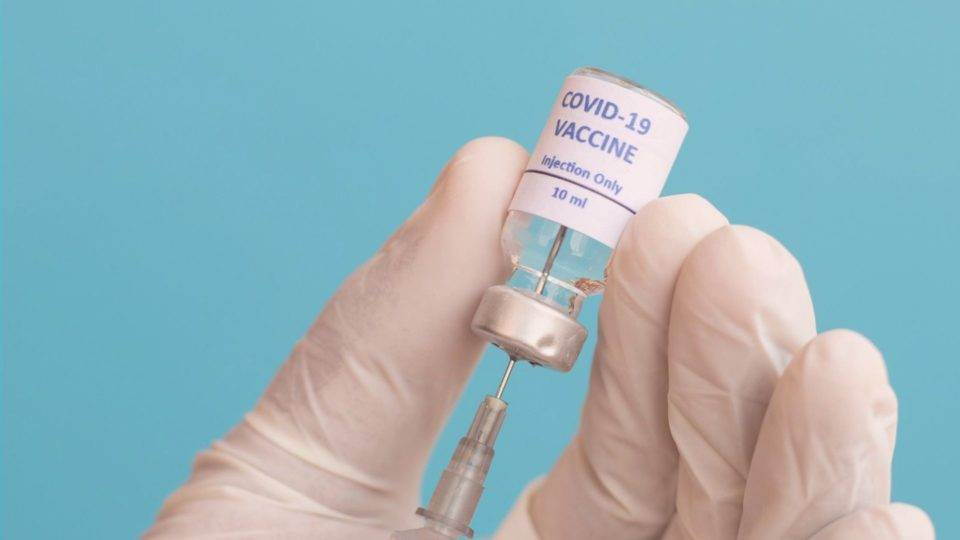)